In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv(r"C:\Users\0404o\Downloads\user_data.csv")

In [3]:
df.head()

,Date,Users
0,8/10/2021,1193.0
1,8/11/2021,1250.0
2,8/12/2021,1160.0
3,8/13/2021,817.0
4,8/14/2021,362.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    417 non-null    object 
 1   Users   417 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
ts = df

In [6]:
ts.columns = ["ds", "y"]
ts = ts.dropna()
ts.head()

,ds,y
0,2021-08-10,1193.0
1,2021-08-11,1250.0
2,2021-08-12,1160.0
3,2021-08-13,817.0
4,2021-08-14,362.0


<Axes: xlabel='ds'>

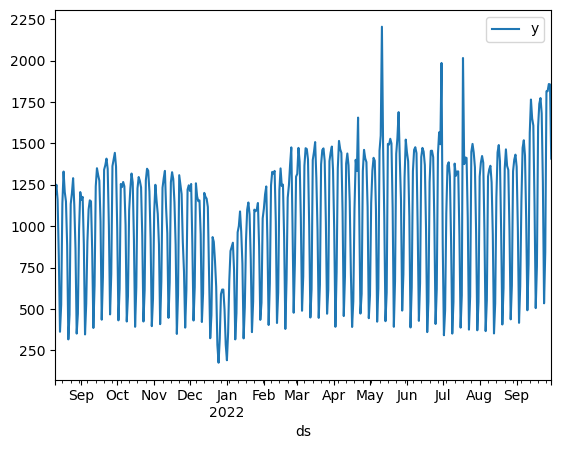

In [7]:
ts.set_index("ds").plot()

In [8]:
model = Prophet().fit(ts)
future = model.make_future_dataframe(60)
forecast = model.predict(future)
forecast.head()

20:17:37 - cmdstanpy - INFO - Chain [1] start processing
20:17:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,1002.046815,1118.159243,1492.147401,1002.046815,1002.046815,311.323226,311.323226,311.323226,311.323226,311.323226,311.323226,0.0,0.0,0.0,1313.370041
1,2021-08-11,1001.111953,1137.978886,1513.312253,1001.111953,1001.111953,326.595595,326.595595,326.595595,326.595595,326.595595,326.595595,0.0,0.0,0.0,1327.707549
2,2021-08-12,1000.177092,1064.921931,1457.453120,1000.177092,1000.177092,264.088220,264.088220,264.088220,264.088220,264.088220,264.088220,0.0,0.0,0.0,1264.265311
3,2021-08-13,999.242230,738.776621,1108.133984,999.242230,999.242230,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,-82.854985,0.0,0.0,0.0,916.387245
4,2021-08-14,998.307368,174.995966,572.338863,998.307368,998.307368,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,-625.529284,0.0,0.0,0.0,372.778084


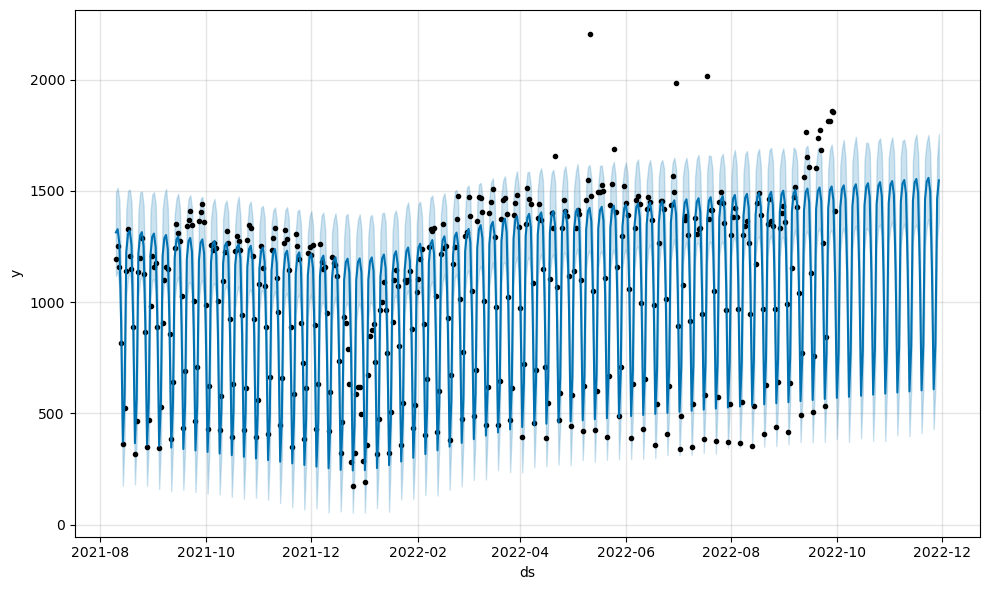

In [16]:
model.plot(forecast);

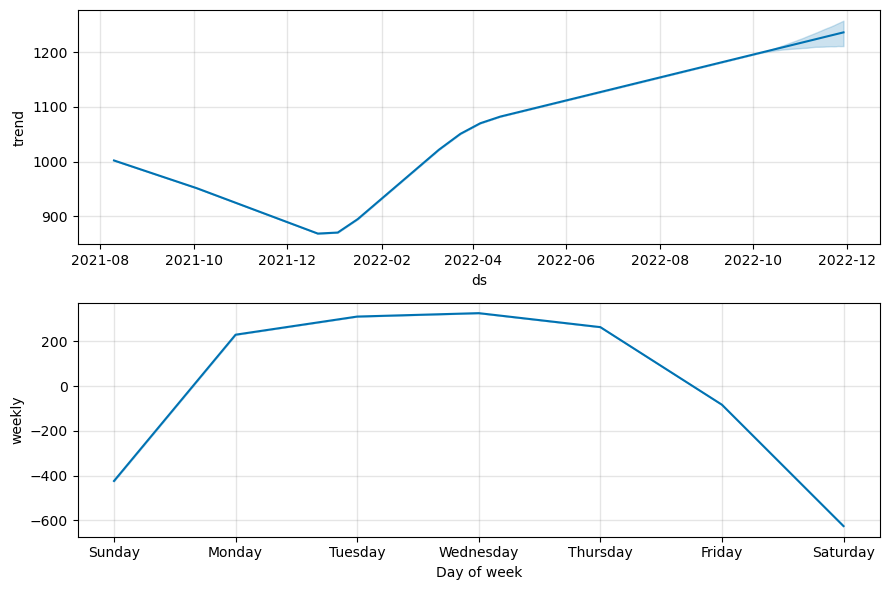

In [13]:
model.plot_components(forecast);

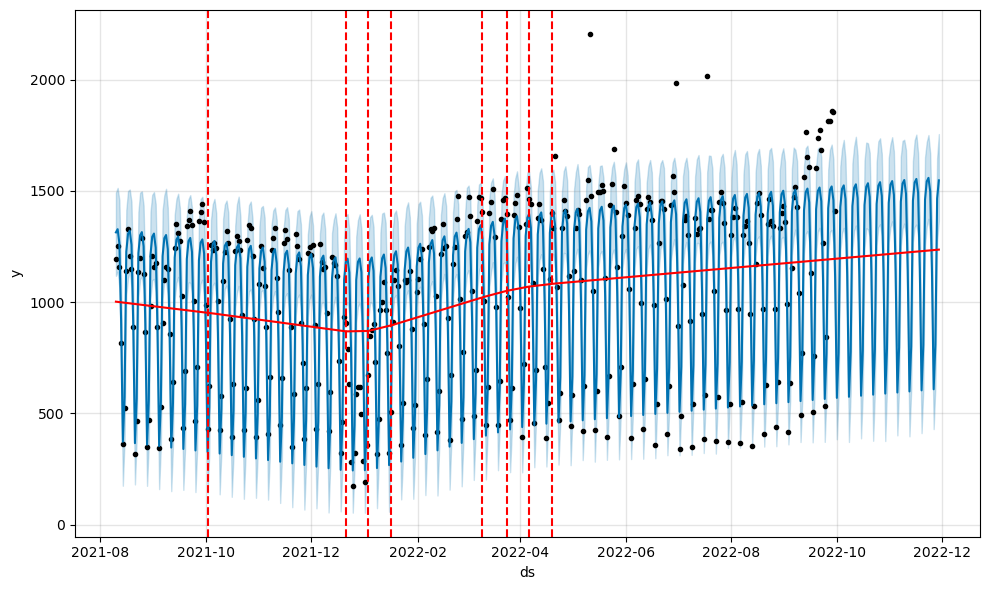

In [19]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(),model,forecast);

In [20]:
model.changepoints

13    2021-08-23
27    2021-09-06
40    2021-09-19
53    2021-10-02
66    2021-10-15
80    2021-10-29
93    2021-11-11
106   2021-11-24
120   2021-12-08
133   2021-12-21
146   2022-01-03
159   2022-01-16
173   2022-01-30
186   2022-02-12
199   2022-02-25
212   2022-03-10
226   2022-03-24
239   2022-04-06
252   2022-04-19
266   2022-05-03
279   2022-05-16
292   2022-05-29
305   2022-06-11
319   2022-06-25
332   2022-07-08
Name: ds, dtype: datetime64[ns]

In [21]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])